EE21S061 Arihant Jain Lab 4 for EE5175 course:

In [1]:
!pip install numpy
!pip install pillow
!pip install matplotlib
!pip install sympy
!pip install opencv-python

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


Importing and installing necessary libraries to setup the notebook.


In [2]:
from matplotlib import pyplot as plt
import random
%matplotlib inline


plt.rcParams['figure.figsize'] = [18, 10] 

In [3]:
from PIL import Image
from numpy import asarray
import cv2
import math
import numpy as np
from sympy import *
# load the image

mandrill=cv2.imread('mandrill.png',0)



In [4]:
mandrill.shape

(256, 256)

Loading in the image and ploting it to visualize

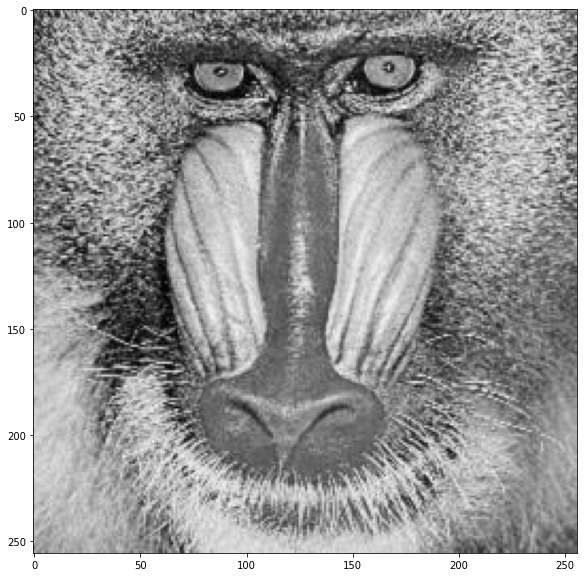

In [5]:
plt.imshow(mandrill,cmap="gray")

Defined a Convulution function which takes in a kernel and an image and outputs image with kernel applied on it

In [6]:
def convolution(kernel,img,pad):
    size=kernel.shape[0]
    img=np.pad(img, (pad, pad), 'constant')
    #Zero padding the image to work around edge cases in the image
    size=math.floor(size/2)
    res=np.zeros((img.shape[0]+size,img.shape[1]+size))
    #np array to store output array in
    for i in range(size,img.shape[0]-size):
        for j in range(size,img.shape[1]-size):
            #applying kernel on np array using slicing this allows us to reduce the length of code 
            # as well as use optimization done by numpy
            res[j][i] = (img[j-size:j+size+1,i-size:i+size+1]*kernel).sum()
    return res[size:img.shape[1]-size,size:img.shape[0]-size]

In [7]:
kernel = np.array(([0, 0, 0],[0,1,0],[0, 0, 0]), dtype="int")

Testing the above function with a simple kernel which does not change the image

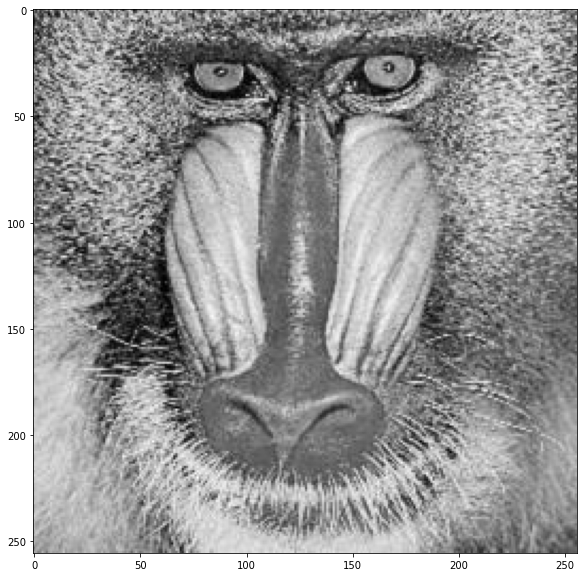

In [8]:
plt.imshow(convolution(kernel,mandrill,1),cmap="gray")

Defined a function to generate a gaussian kernel given a value of sigma

In [12]:
def gaussiankernel(sigma):
    size=math.ceil(6*sigma+1)
    #size of kernel depending upon the sigma
    if size%2==0:
        size+=1
    kernel=np.zeros((size,size))
    #intializing kernel array with zeros
    if sigma==0:
        #mathematical operation fail for -ve value for sigma so added this check to account for it
        print("sigma seems fishy using default kernel")
        return np.array(([0, 0, 0],[0,1,0],[0, 0, 0]), dtype="int")
    temp1=1/(2*np.pi*(sigma**2))
    temp2=2*(sigma**2)
    #the function to calculate gaussian value for each cell have certain constant accross them so computing them beforehand
    with np.nditer(kernel, flags=['multi_index'], op_flags=['writeonly']) as it:
        #iterating over numpy array on both x and y axis together to compute the array efficently
        for h in it:
            m=it.multi_index[1]
            n=it.multi_index[0]
            h[...] = temp1*np.exp(-1*(((m-size/2)**2)+((n-size/2)**2))/temp2)
    kernel=kernel/np.sum(kernel)
    return kernel

Checked the output of the funtion above it seems to give good results lets check it now on our original image

In [10]:
gaussiankernel(1)

array([[7.62955214e-07, 1.53243651e-05, 1.13232594e-04, 3.07798102e-04,
        3.07798102e-04, 1.13232594e-04, 1.53243651e-05],
       [1.53243651e-05, 3.07798102e-04, 2.27433744e-03, 6.18229013e-03,
        6.18229013e-03, 2.27433744e-03, 3.07798102e-04],
       [1.13232594e-04, 2.27433744e-03, 1.68052069e-02, 4.56812886e-02,
        4.56812886e-02, 1.68052069e-02, 2.27433744e-03],
       [3.07798102e-04, 6.18229013e-03, 4.56812886e-02, 1.24174617e-01,
        1.24174617e-01, 4.56812886e-02, 6.18229013e-03],
       [3.07798102e-04, 6.18229013e-03, 4.56812886e-02, 1.24174617e-01,
        1.24174617e-01, 4.56812886e-02, 6.18229013e-03],
       [1.13232594e-04, 2.27433744e-03, 1.68052069e-02, 4.56812886e-02,
        4.56812886e-02, 1.68052069e-02, 2.27433744e-03],
       [1.53243651e-05, 3.07798102e-04, 2.27433744e-03, 6.18229013e-03,
        6.18229013e-03, 2.27433744e-03, 3.07798102e-04]])

Text(0.5, 1.0, 'Original')

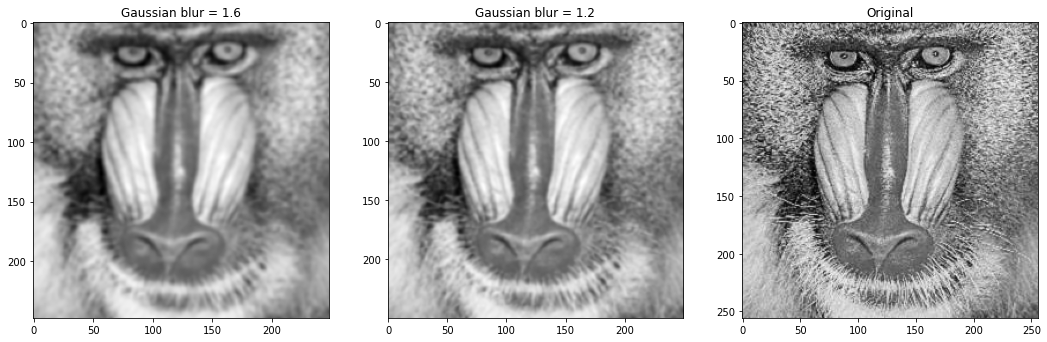

In [11]:
img=mandrill
values=[1.6,1.2]
figure, axis = plt.subplots(1, len(values)+1)
for i in range(len(values)):
    axis[i].imshow(convolution(gaussiankernel(values[i]),img,1),cmap="gray")
    title="Gaussian blur = " + str(values[i])
    axis[i].set_title(title)
axis[-1].imshow(img,cmap="gray")
axis[-1].set_title("Original")

We can see visually there is visible blur which depends upon the sigma used for the gaussian kernel.

The value of sigma defines the spread of the image and consequently the blur in the image we can see how blur reduce details of the original image like the whisker and the texture of the skin

Text(0.5, 1.0, 'Original')

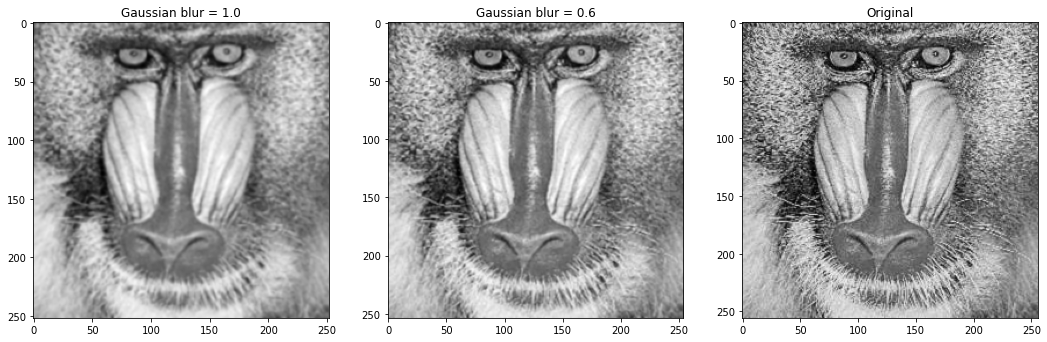

In [24]:
values=[1.0,0.6]
figure, axis = plt.subplots(1, len(values)+1)
for i in range(len(values)):
    axis[i].imshow(convolution(gaussiankernel(values[i]),img,1),cmap="gray")
    title="Gaussian blur = " + str(values[i])
    axis[i].set_title(title)
axis[-1].imshow(img,cmap="gray")
axis[-1].set_title("Original")

sigma seems fishy using default kernel


Text(0.5, 1.0, 'Original')

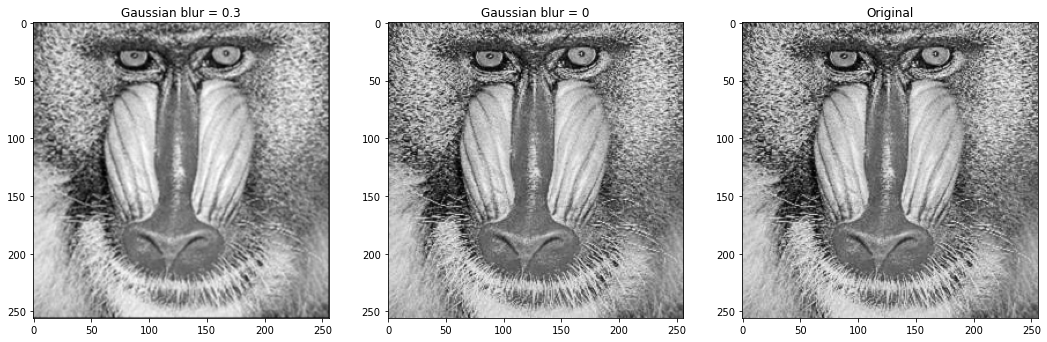

In [25]:
values=[0.3,0]
figure, axis = plt.subplots(1, len(values)+1)
for i in range(len(values)):
    axis[i].imshow(convolution(gaussiankernel(values[i]),mandrill,1),cmap="gray")
    title="Gaussian blur = " + str(values[i])
    axis[i].set_title(title)
axis[-1].imshow(img,cmap="gray")
axis[-1].set_title("Original")

Text(0.5, 1.0, 'Original')

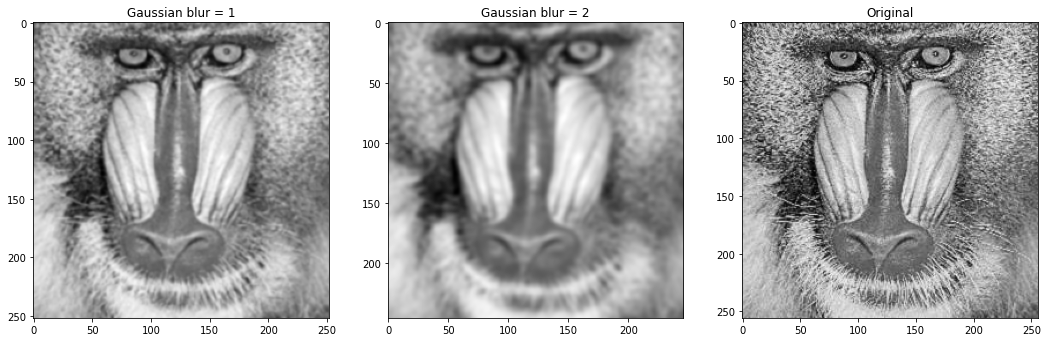

In [26]:
values=[1,2]
figure, axis = plt.subplots(1, len(values)+1)
for i in range(len(values)):
    axis[i].imshow(convolution(gaussiankernel(values[i]),mandrill,1),cmap="gray")
    title="Gaussian blur = " + str(values[i])
    axis[i].set_title(title)
axis[-1].imshow(img,cmap="gray")
axis[-1].set_title("Original")

Text(0.5, 1.0, 'Original')

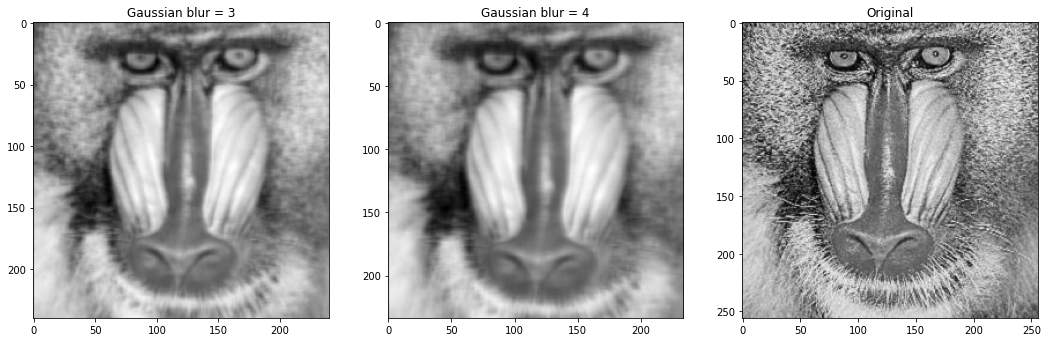

In [29]:
values=[3,4]
figure, axis = plt.subplots(1, len(values)+1)
for i in range(len(values)):
    axis[i].imshow(convolution(gaussiankernel(values[i]),mandrill,1),cmap="gray")
    title="Gaussian blur = " + str(values[i])
    axis[i].set_title(title)
axis[-1].imshow(img,cmap="gray")
axis[-1].set_title("Original")

After trying the values given in the question i went ahead and tried the code for a few more value which as we can see above blurs the image even more